In [15]:
import sys
sys.path.insert(0, '../scripts')

import pandas as pd
import numpy as np
import direction_transition as dit
from meals import find_meals, graph_group_stats, find_meals_paper
import paths
from preprocessing import read_csv_clean
import intervals as invs

pellet_count_threshold = 5
collect_quantile = 0.6
pellet_quantile = 0.6

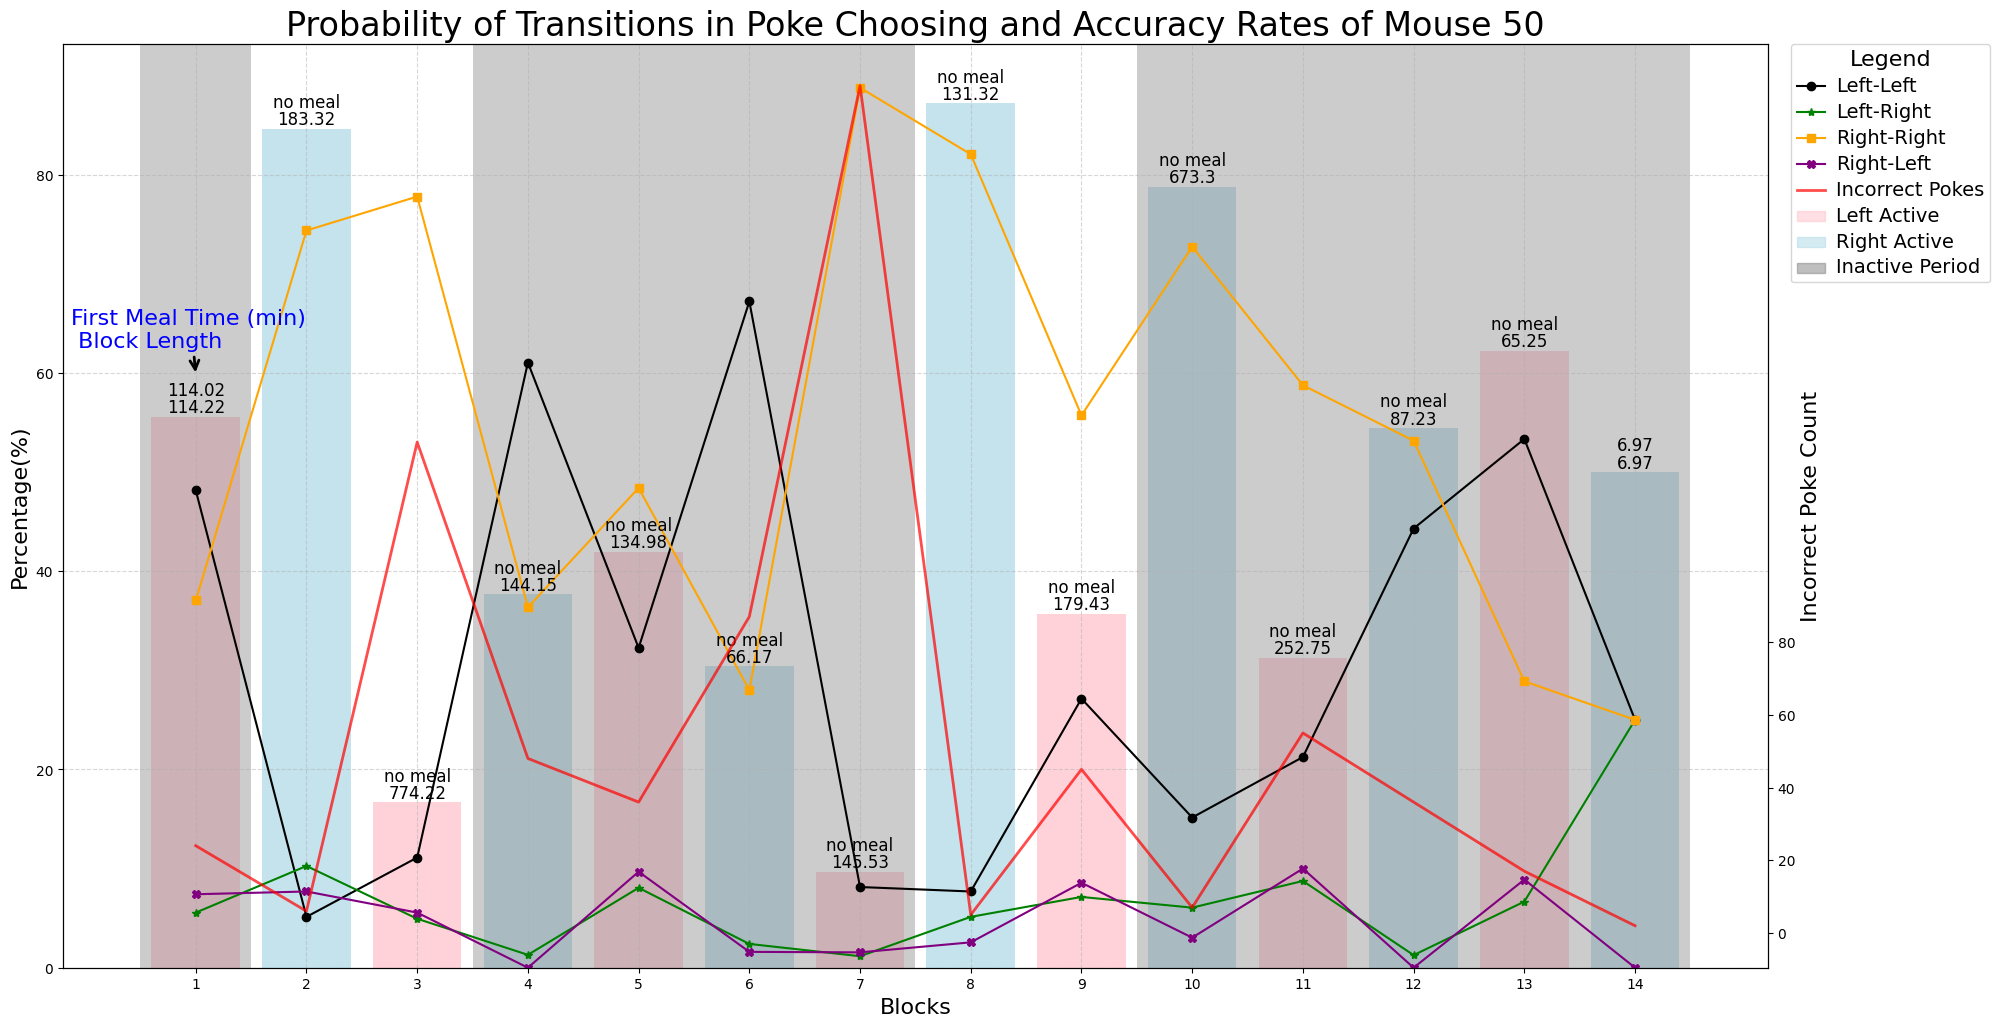

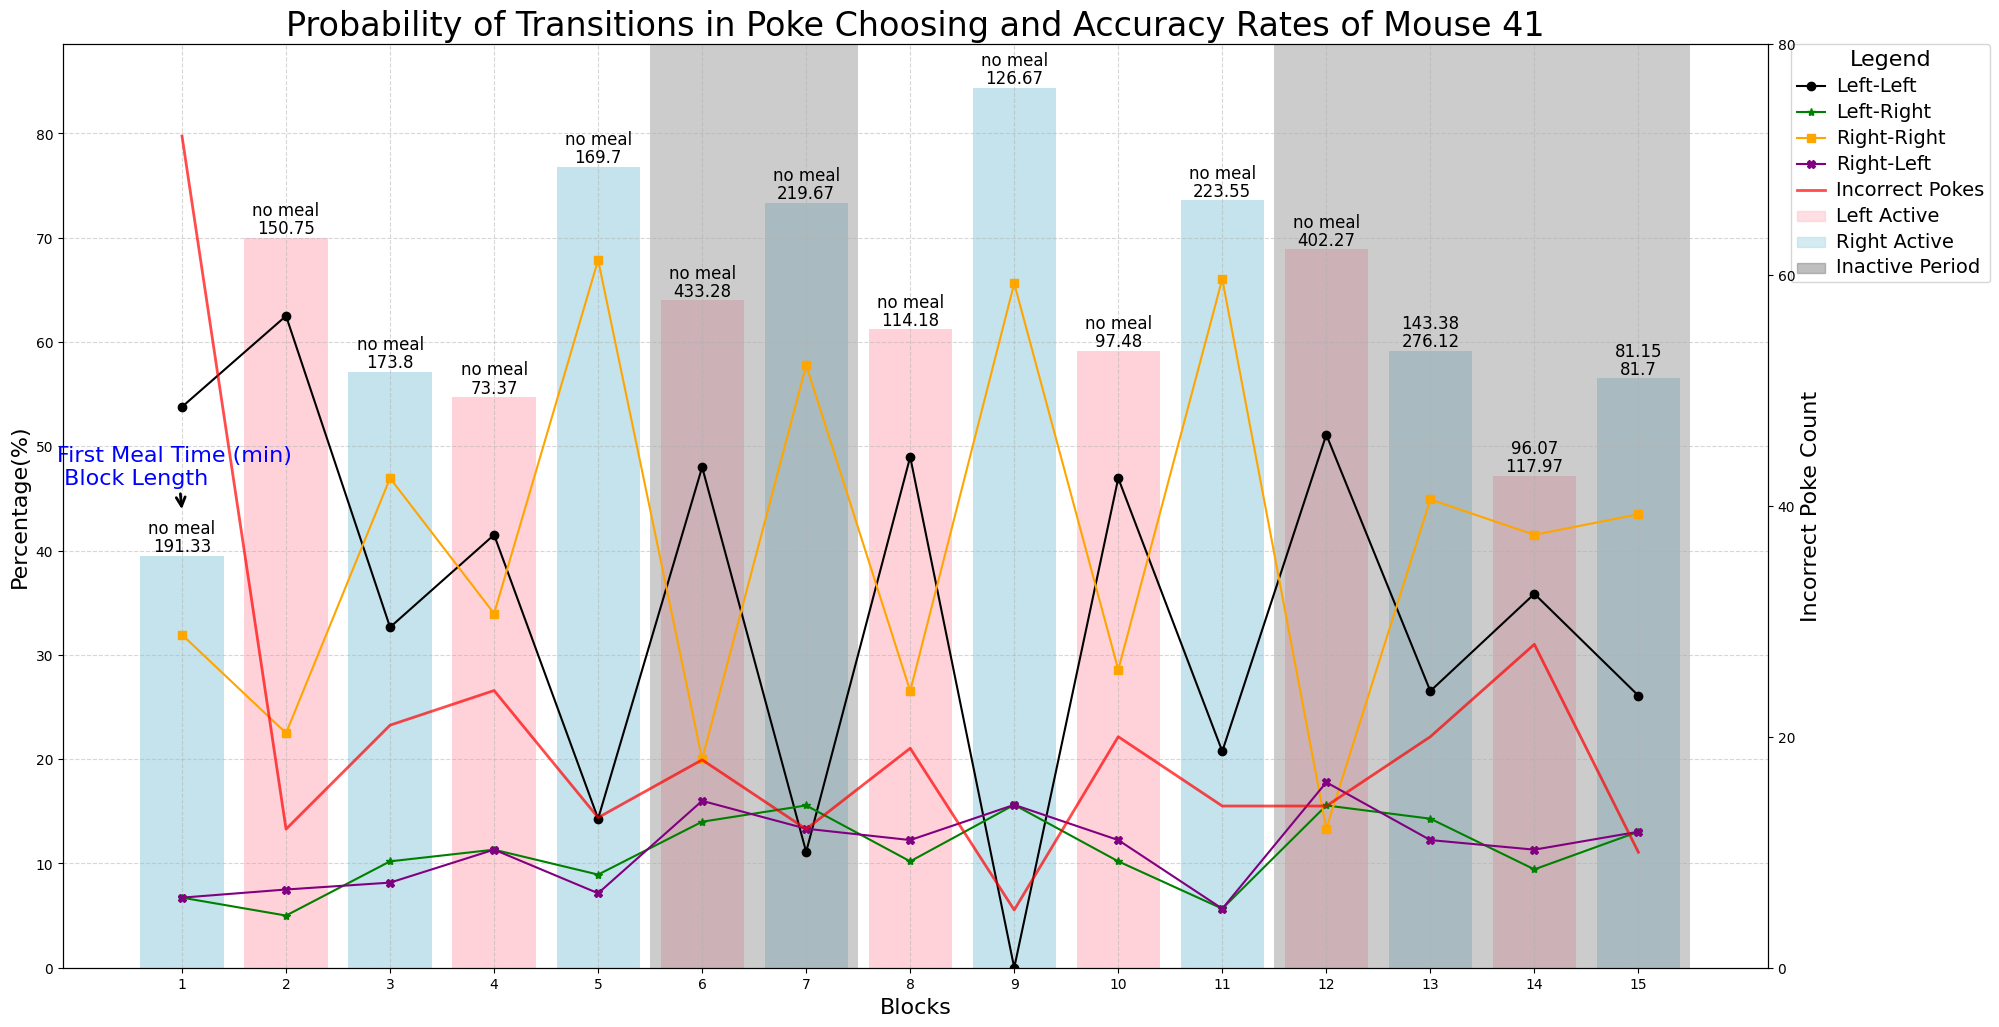

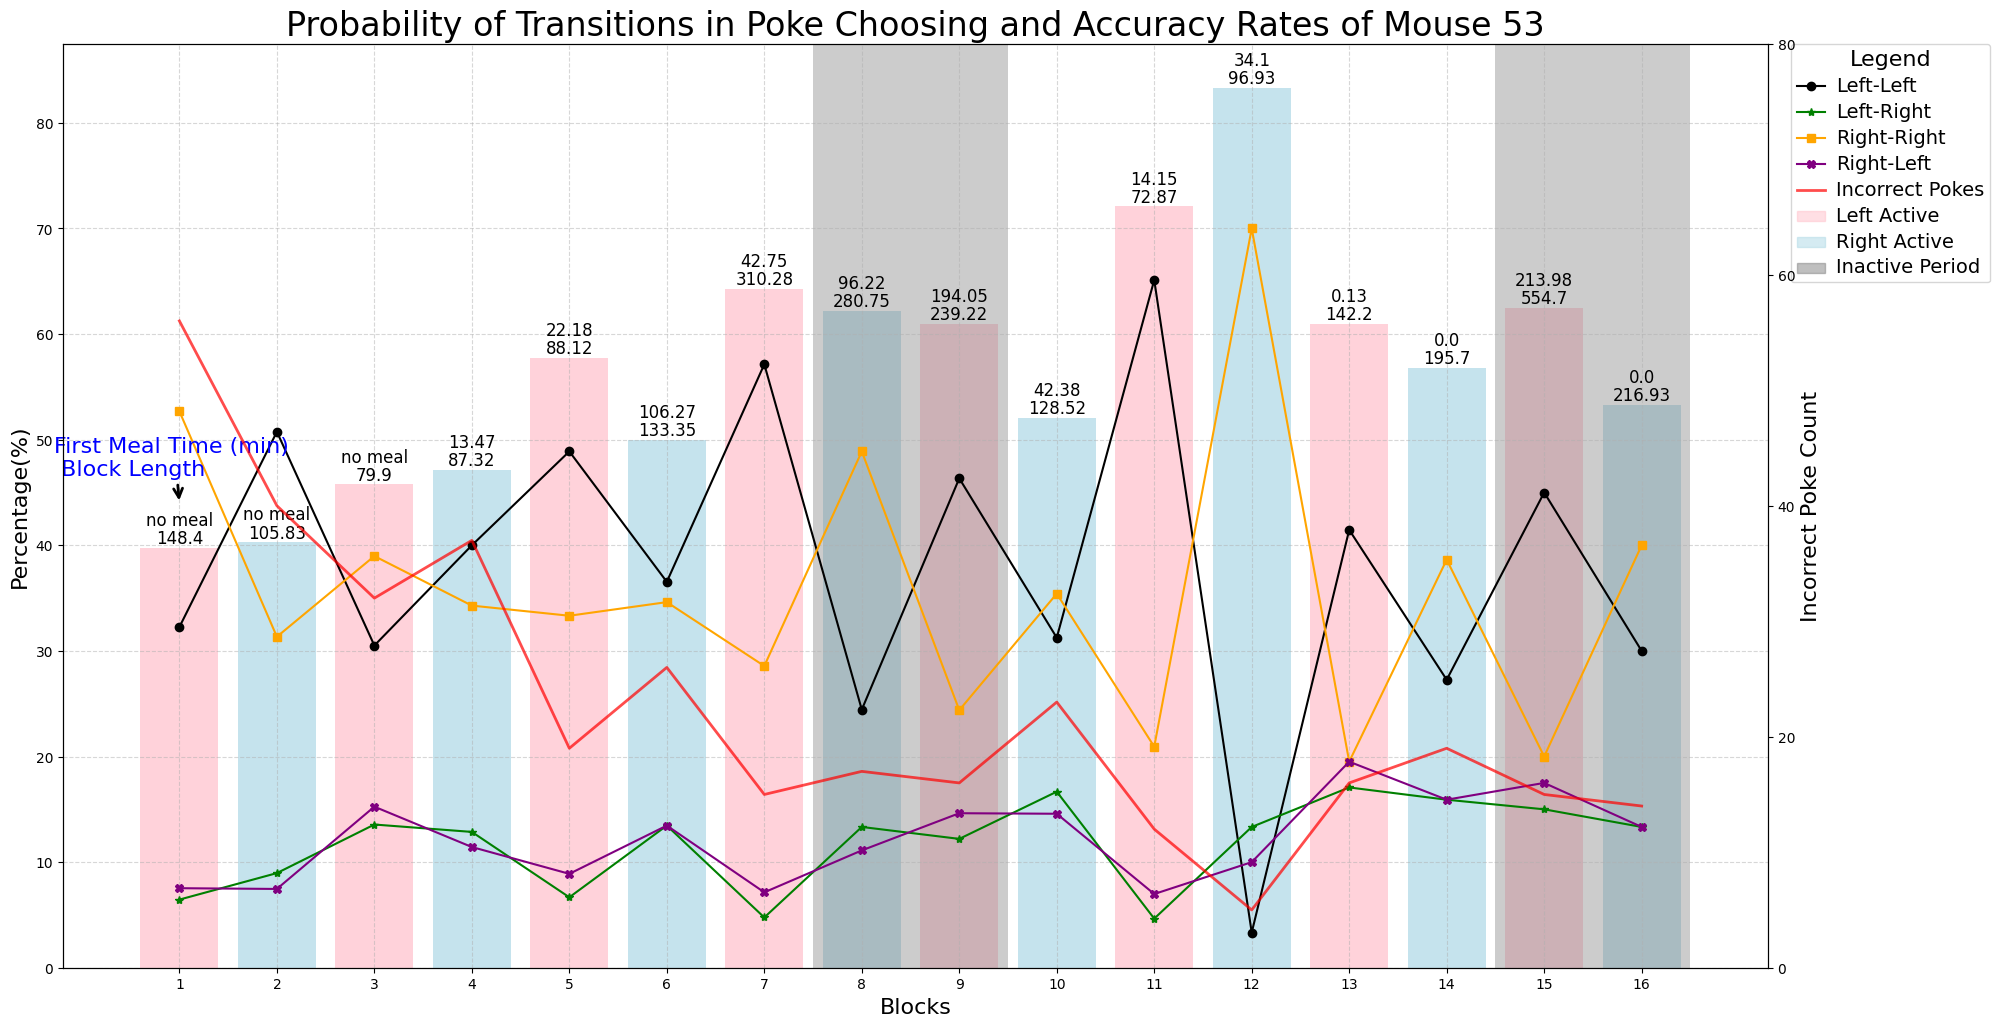

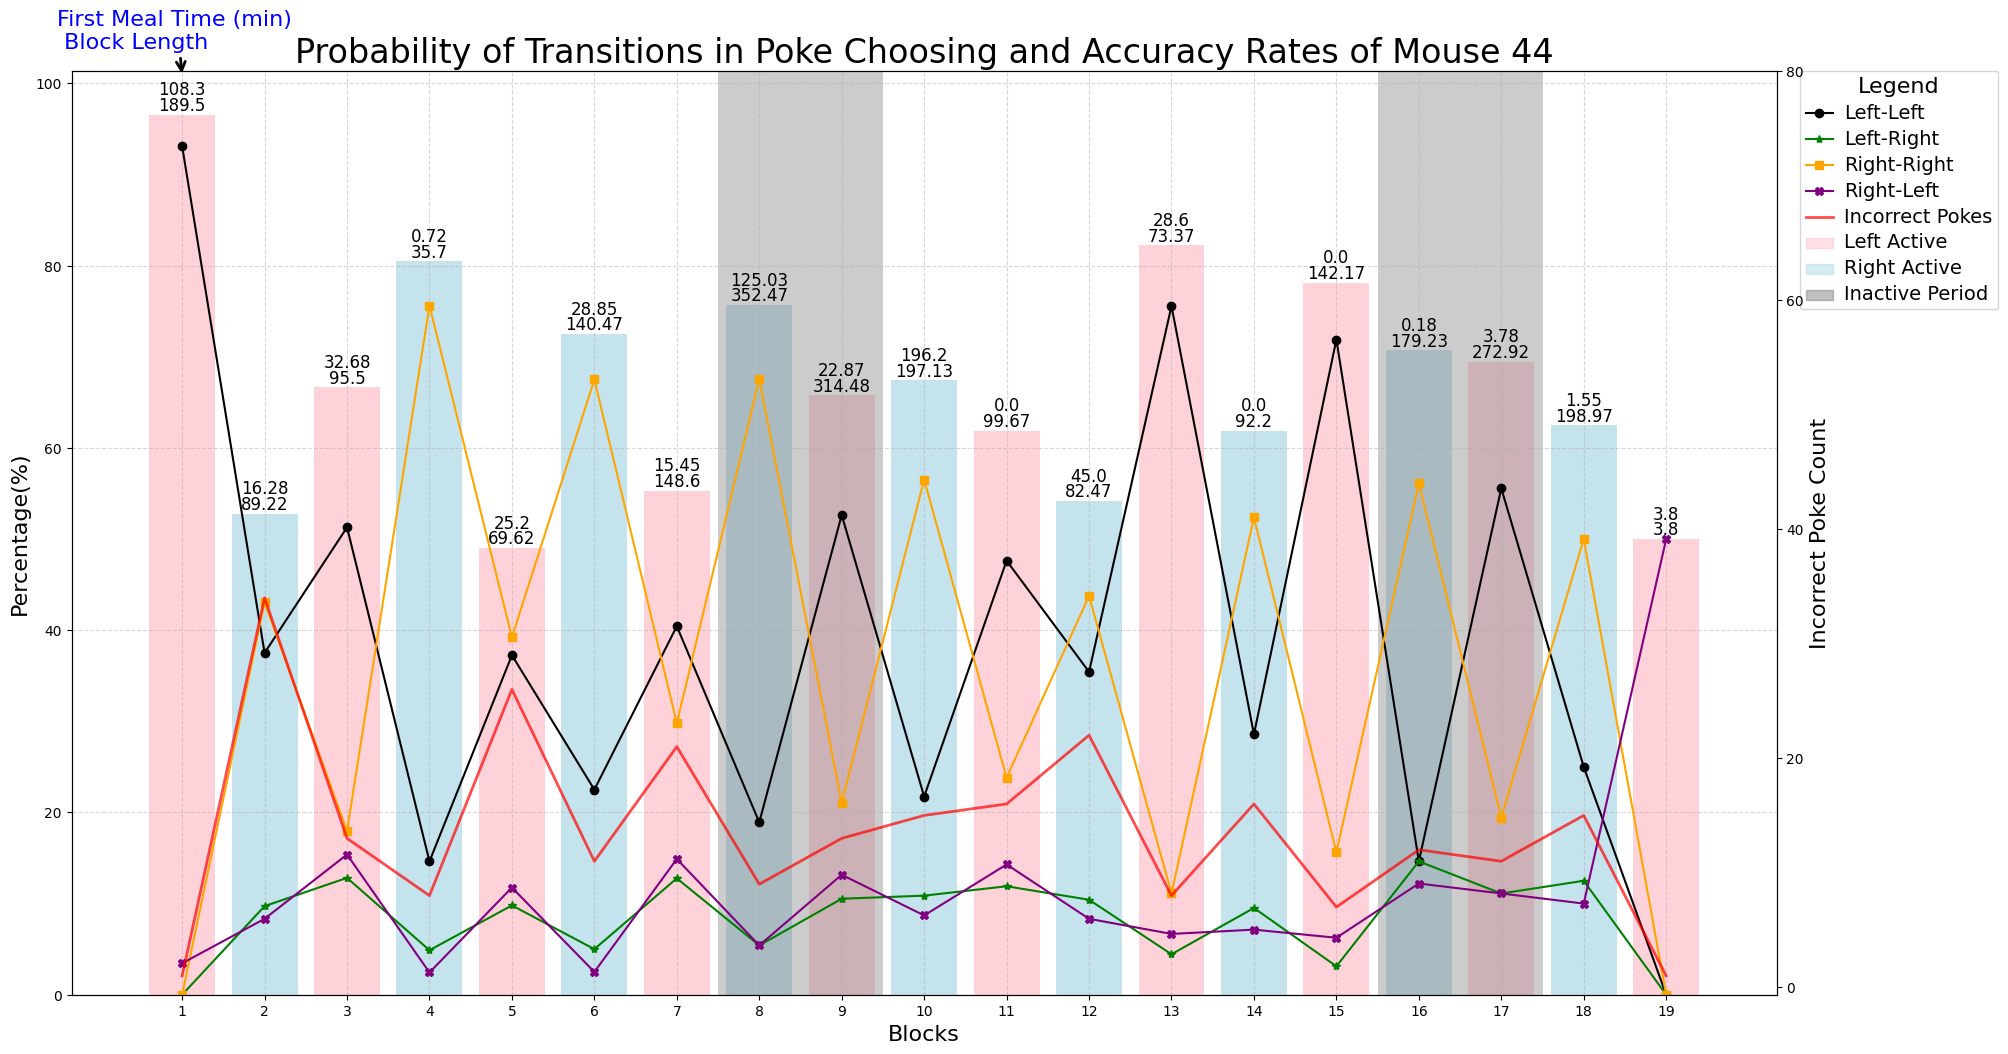

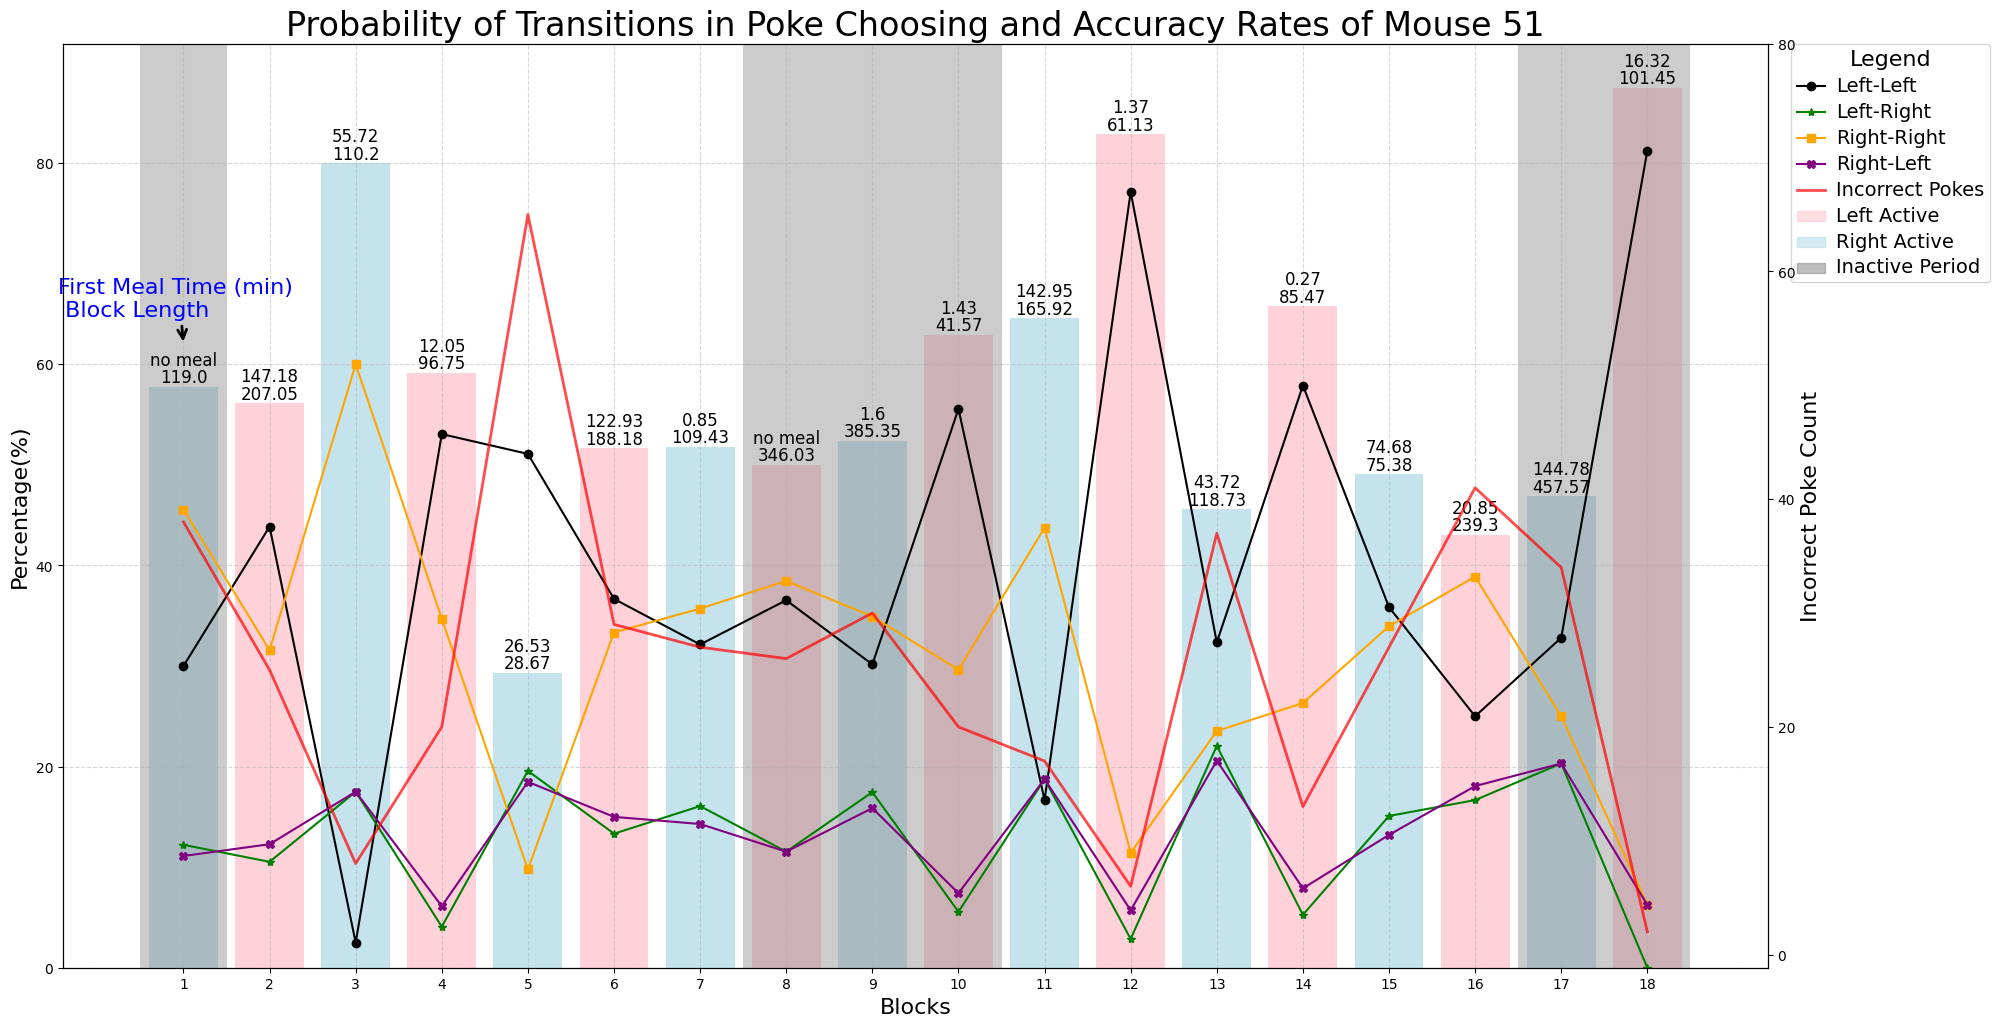

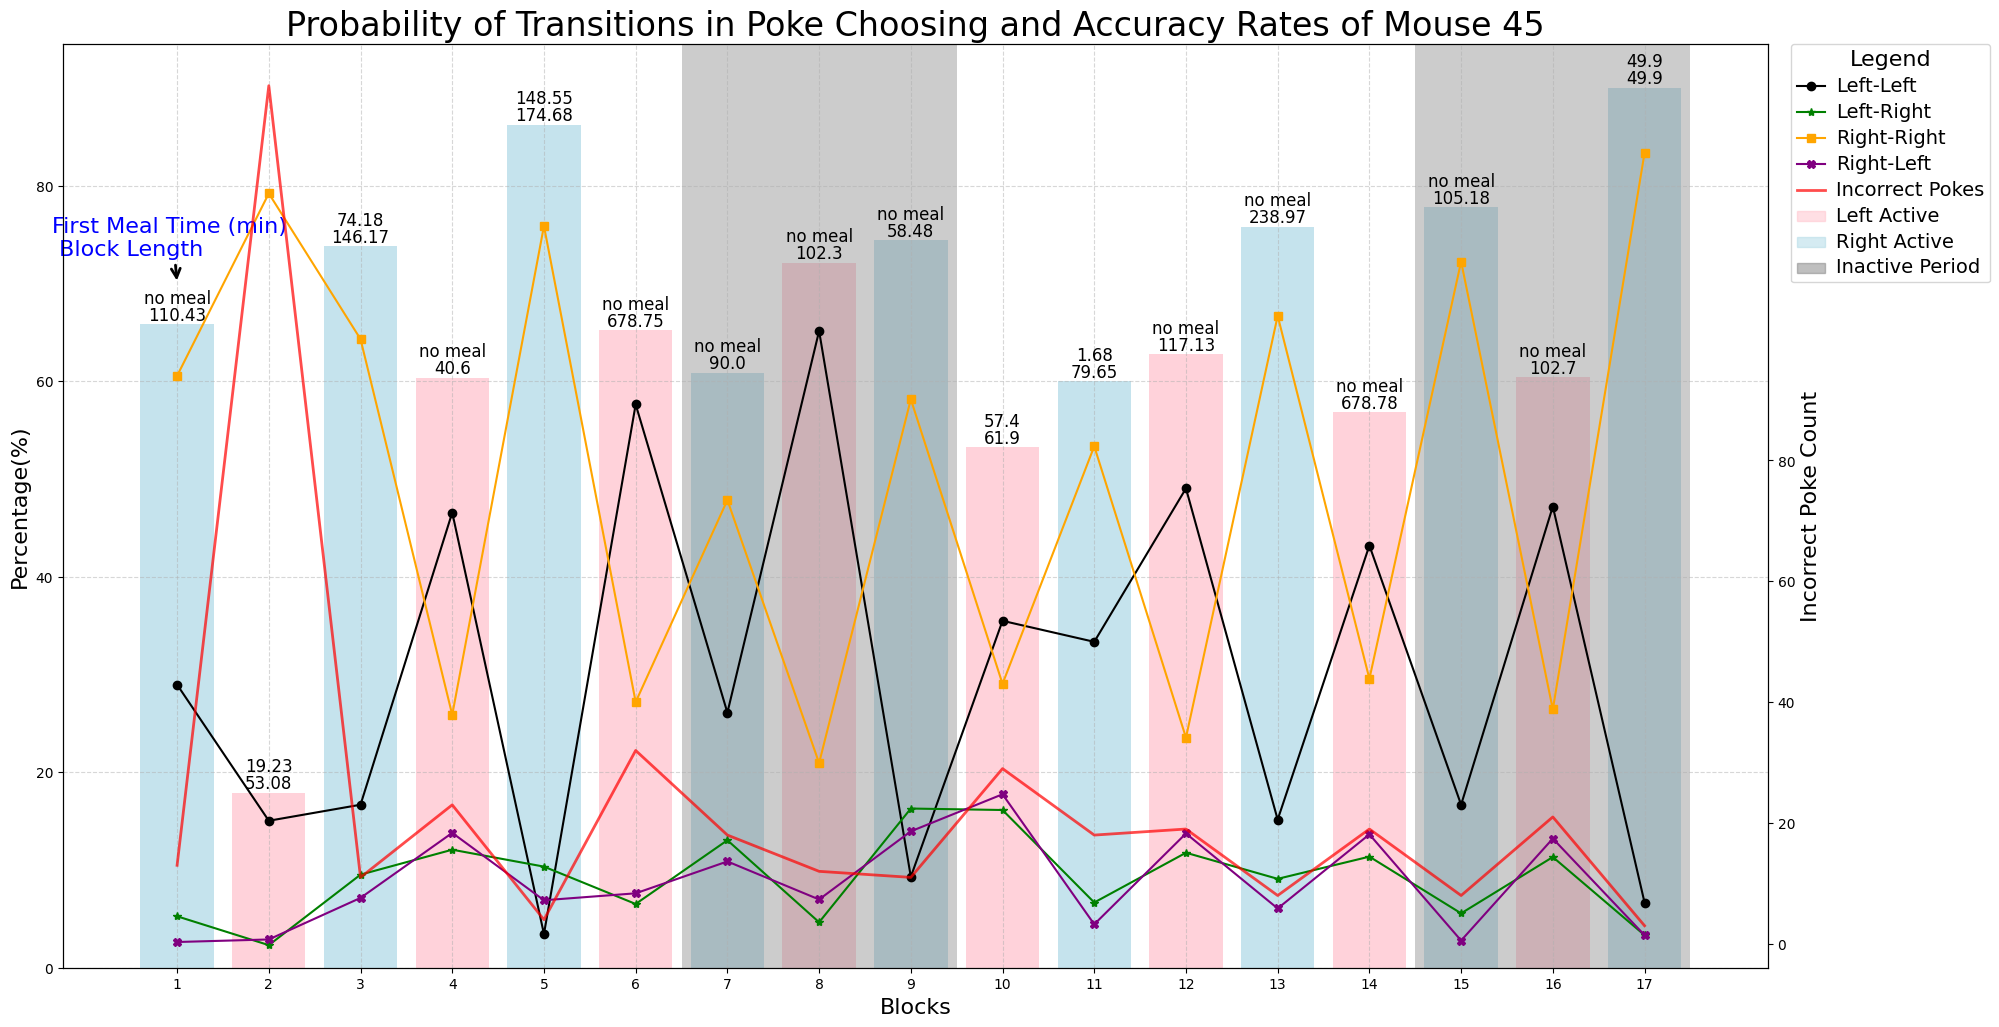

In [16]:
ctrl_block_fir_meal = []
ctrl_block_fir_meal_prop = []
for path in paths.reversal_ivsa_ctrl:
        data_dropped = read_csv_clean(path, remove_trivial=False, collect_time=True)
        blocks = dit.split_data_to_blocks(data_dropped)
        # meal = ml.find_meals(data, pellet_count_threshold=pellet_count_threshold, 
        #                      collect_quantile=collect_quantile, pellet_quantile=pellet_quantile)
        meal = find_meals_paper(data_dropped, time_threshold=10)
        data_stats = dit.get_transition_info(blocks, meal, reverse=True)
        
        avg_ratio, avg_time = dit.first_meal_stats(data_stats, ignore_inactive=True)
        ctrl_block_fir_meal.append(avg_time)
        ctrl_block_fir_meal_prop.append(avg_ratio)
        dit.graph_tranition_stats(data_stats, blocks, path)
        # print(meal_threshold(data_dropped, collect_quantile, pellet_quantile))

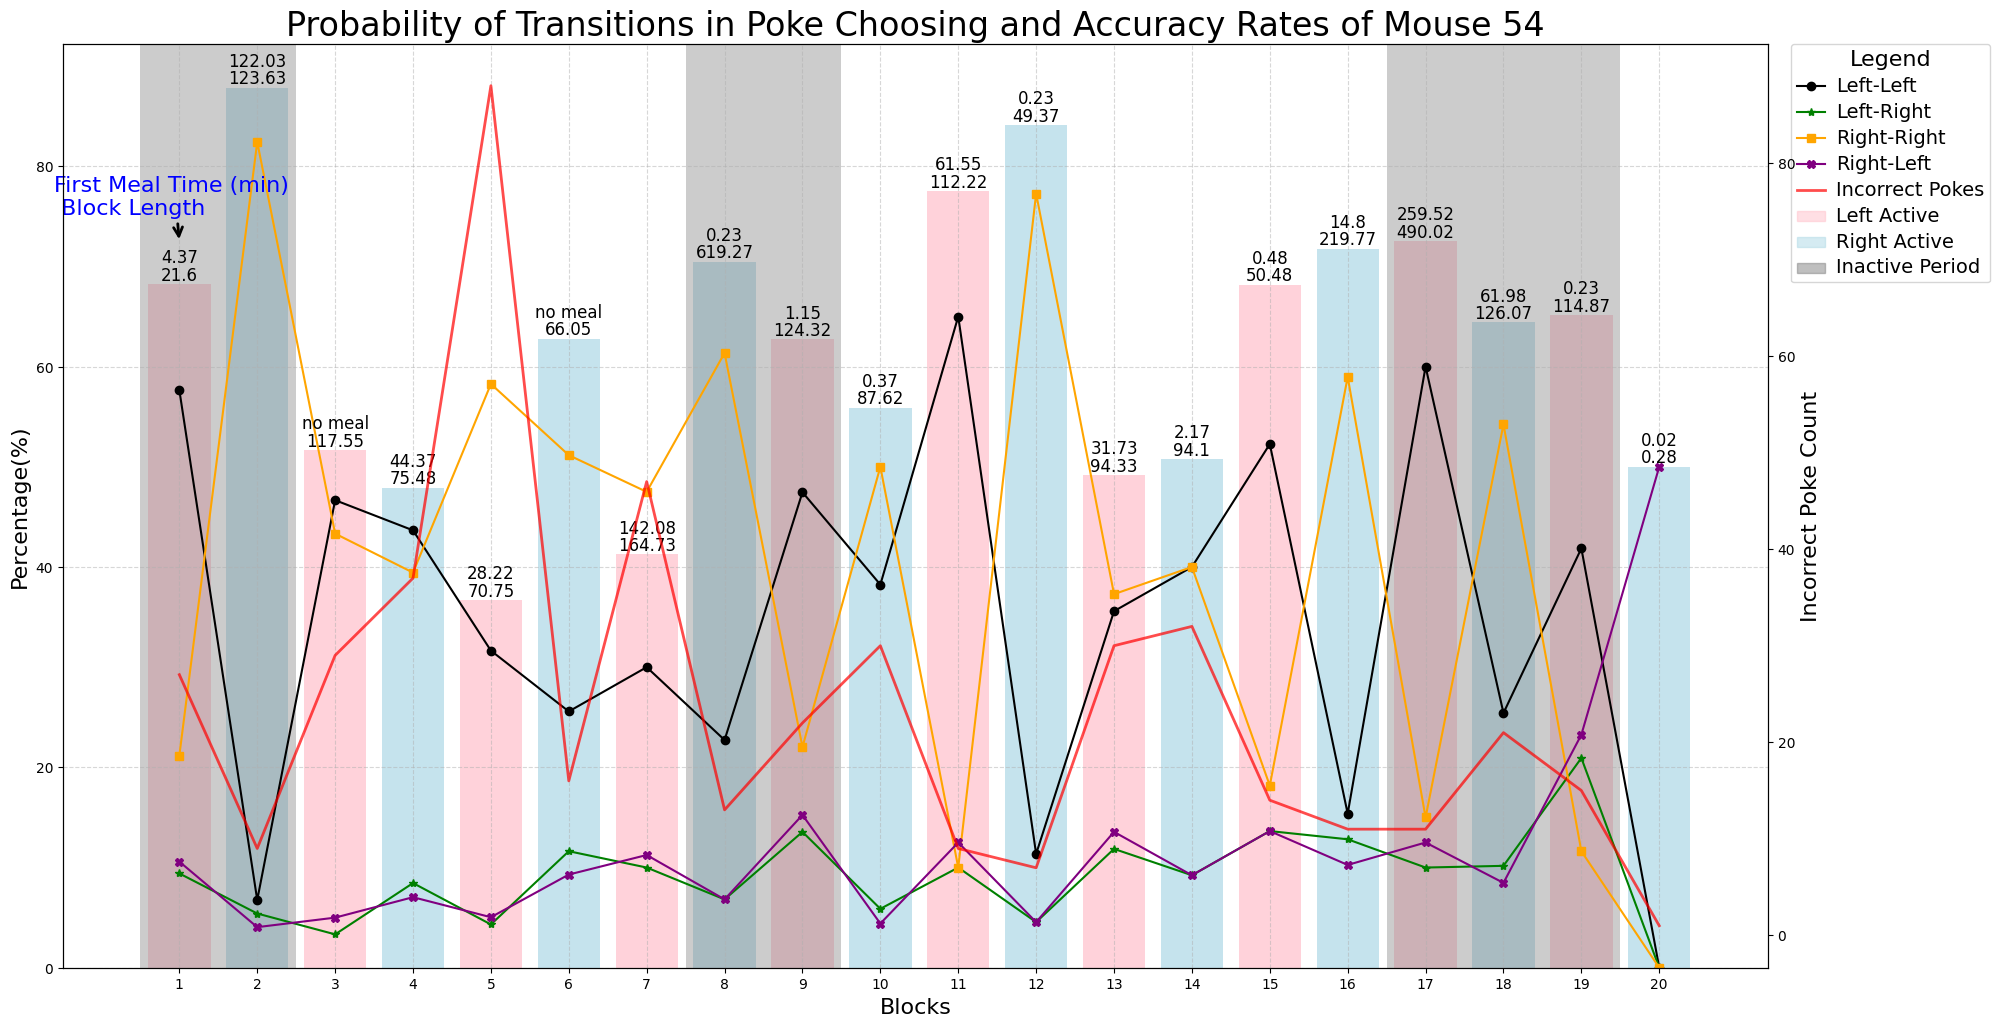

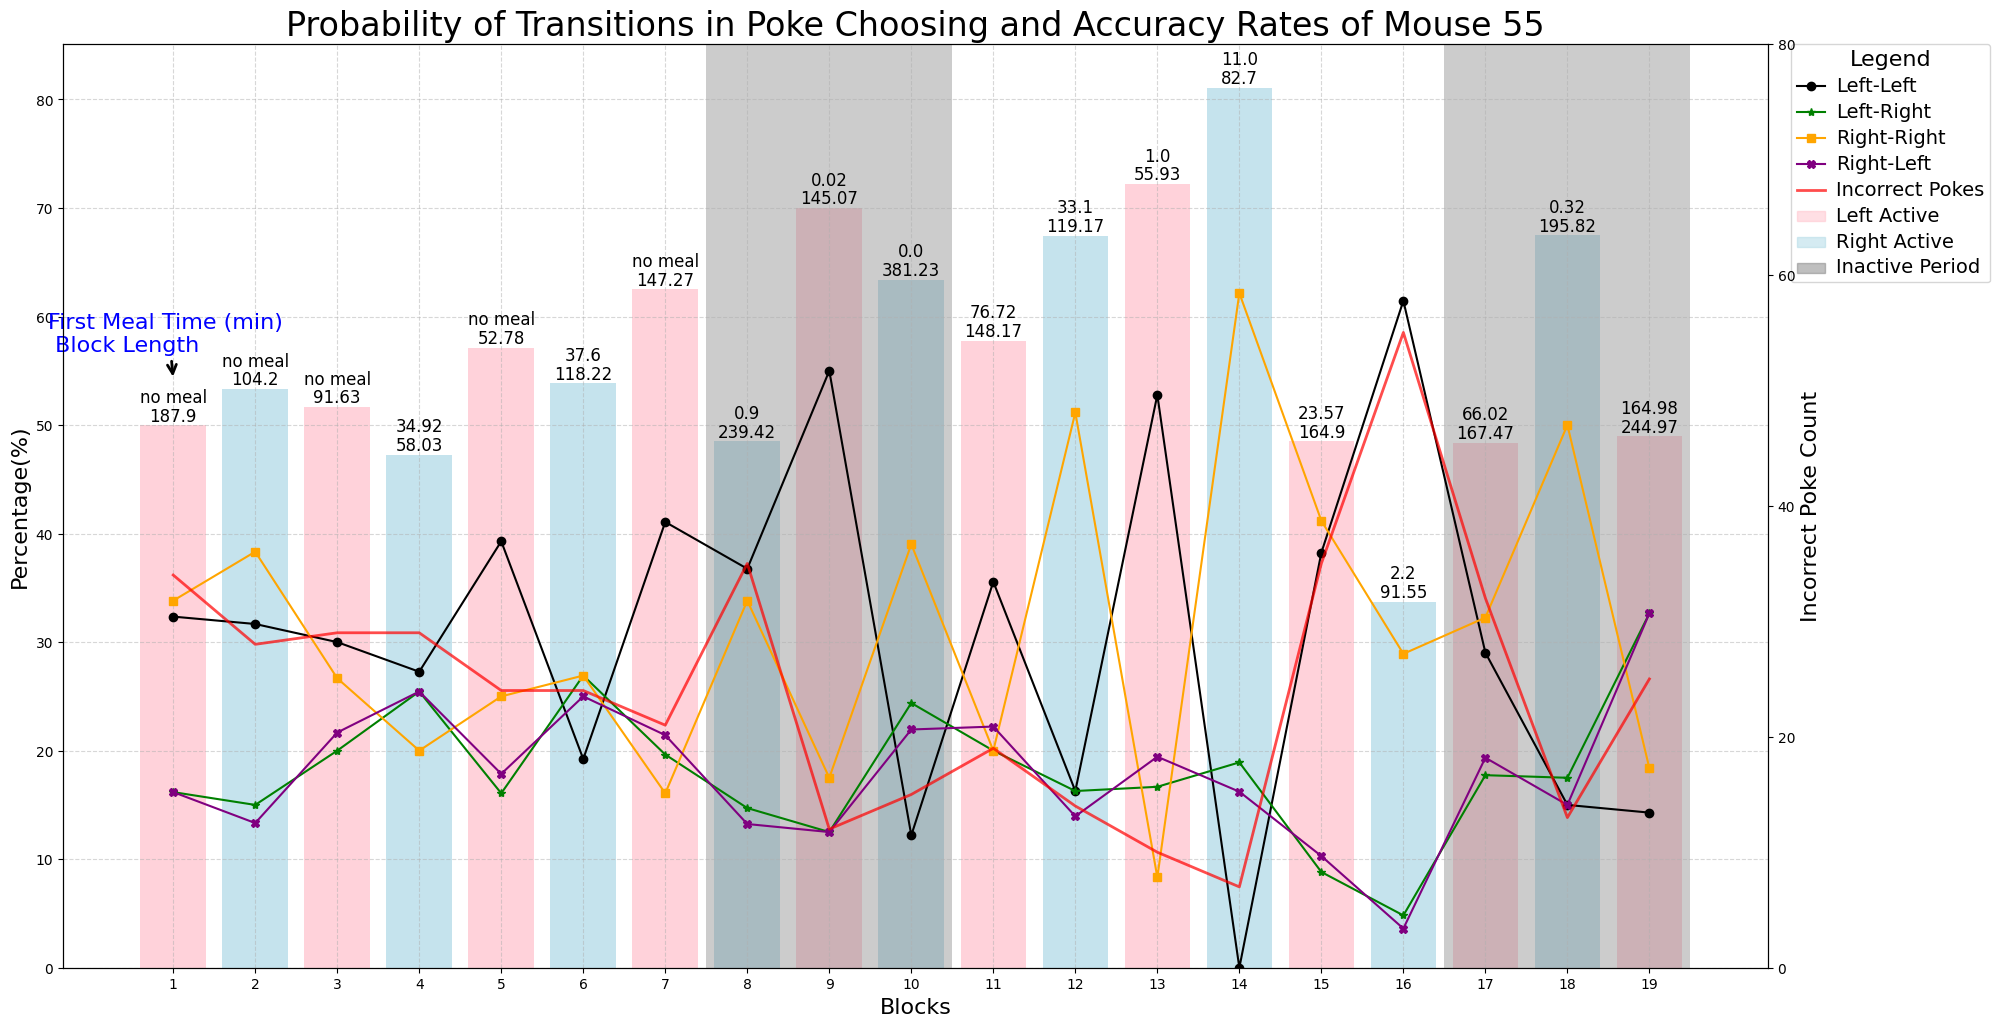

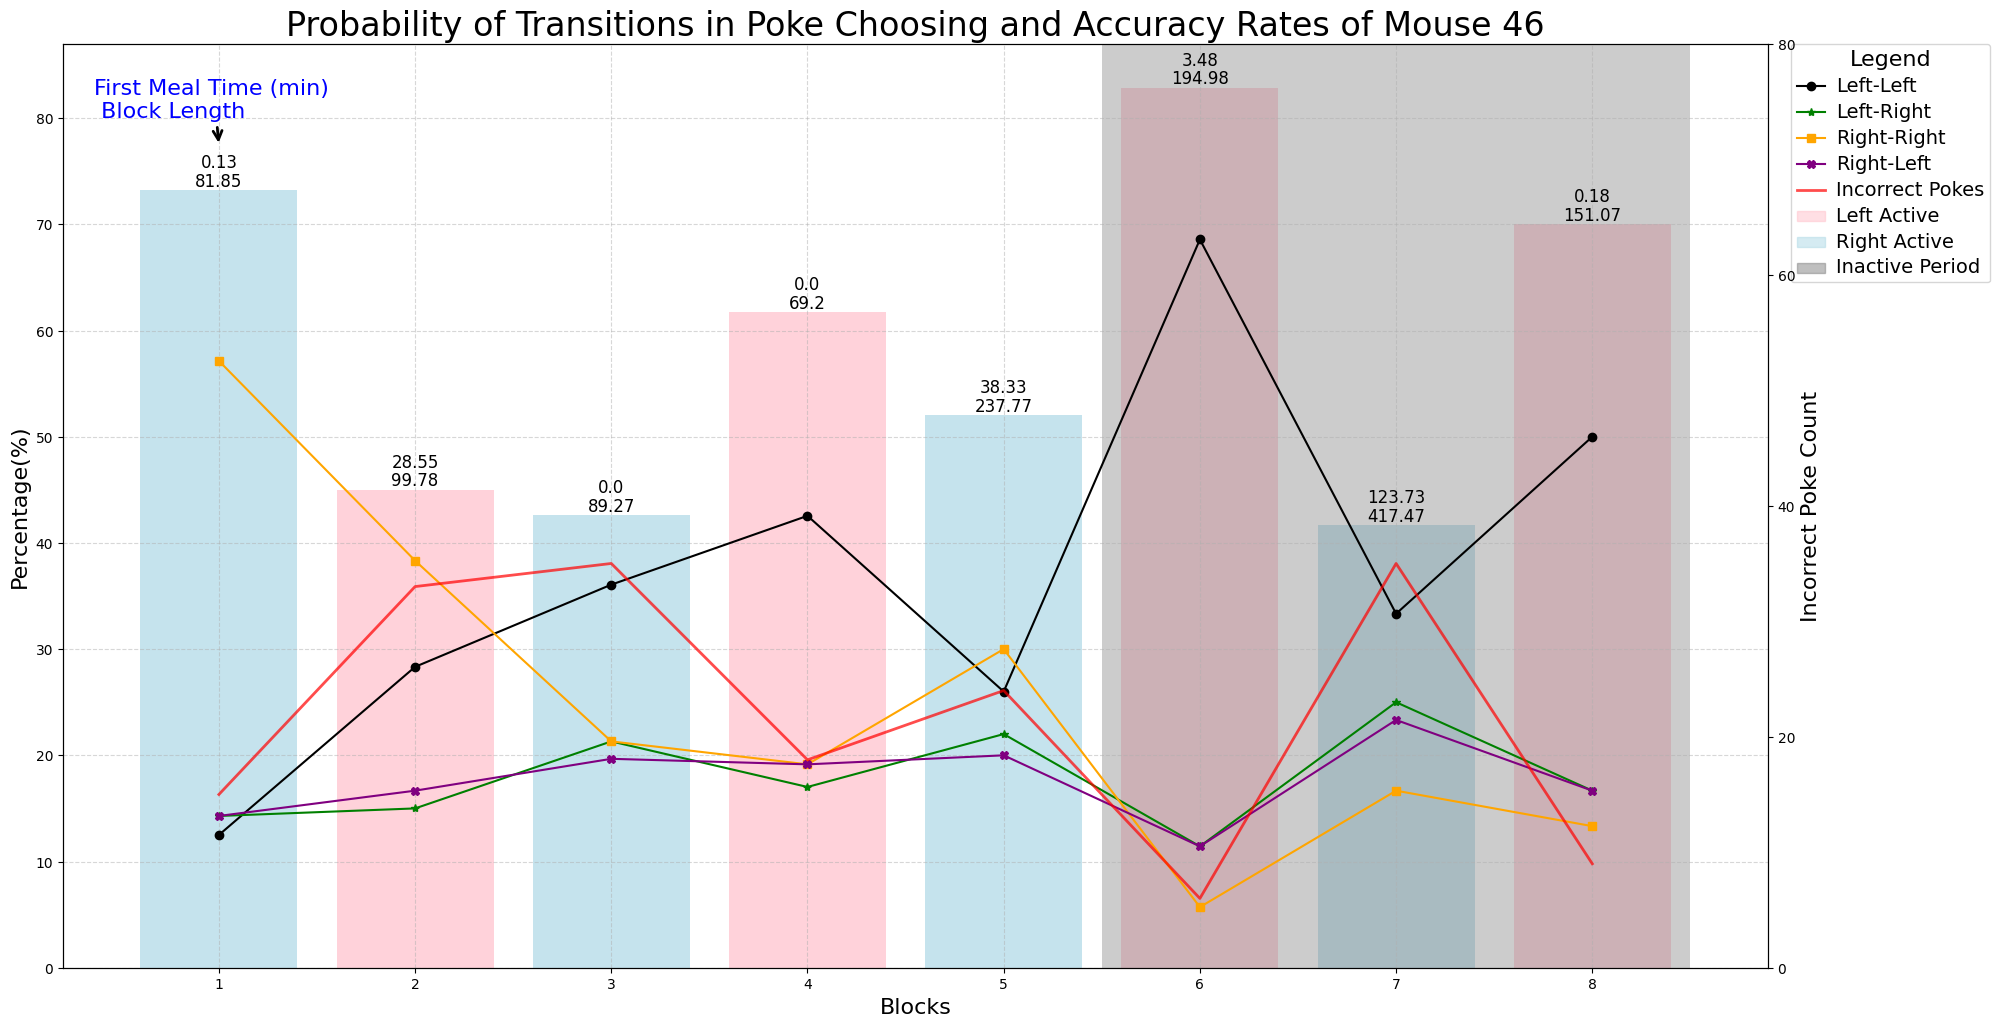

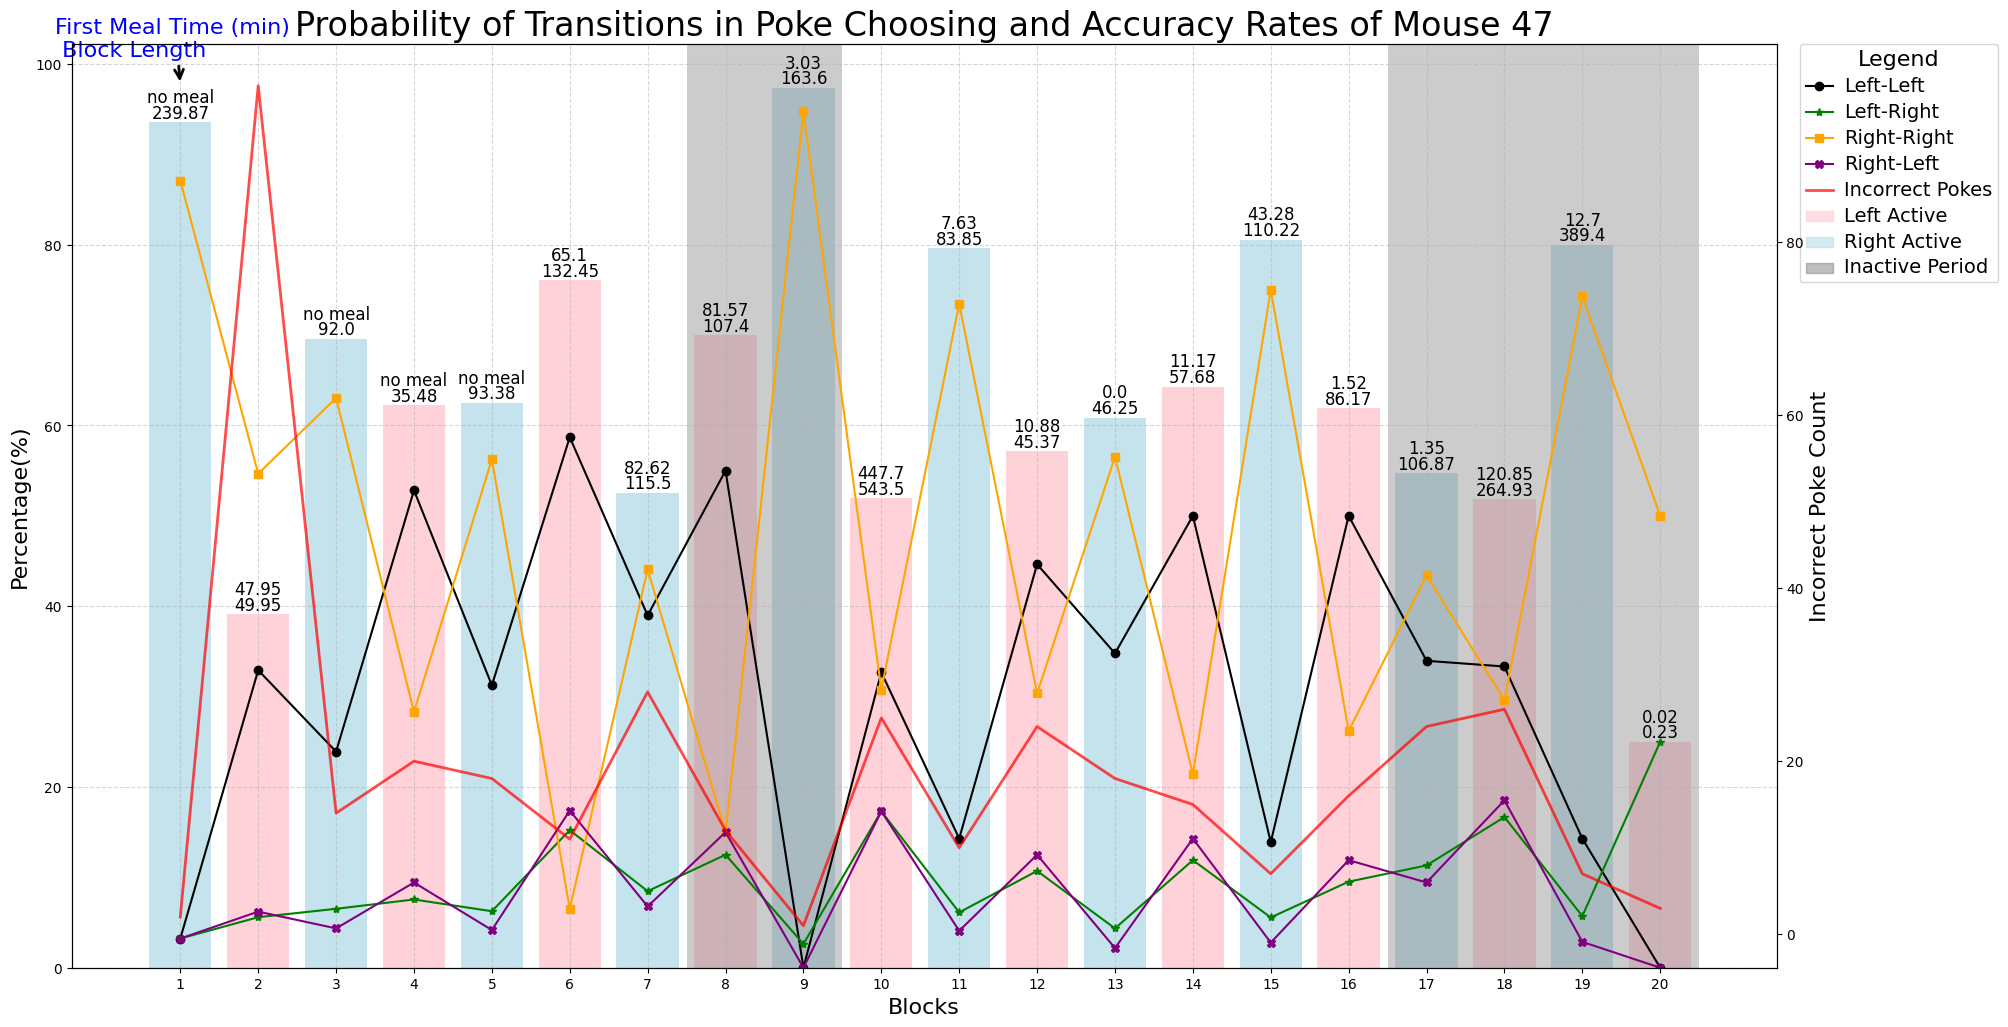

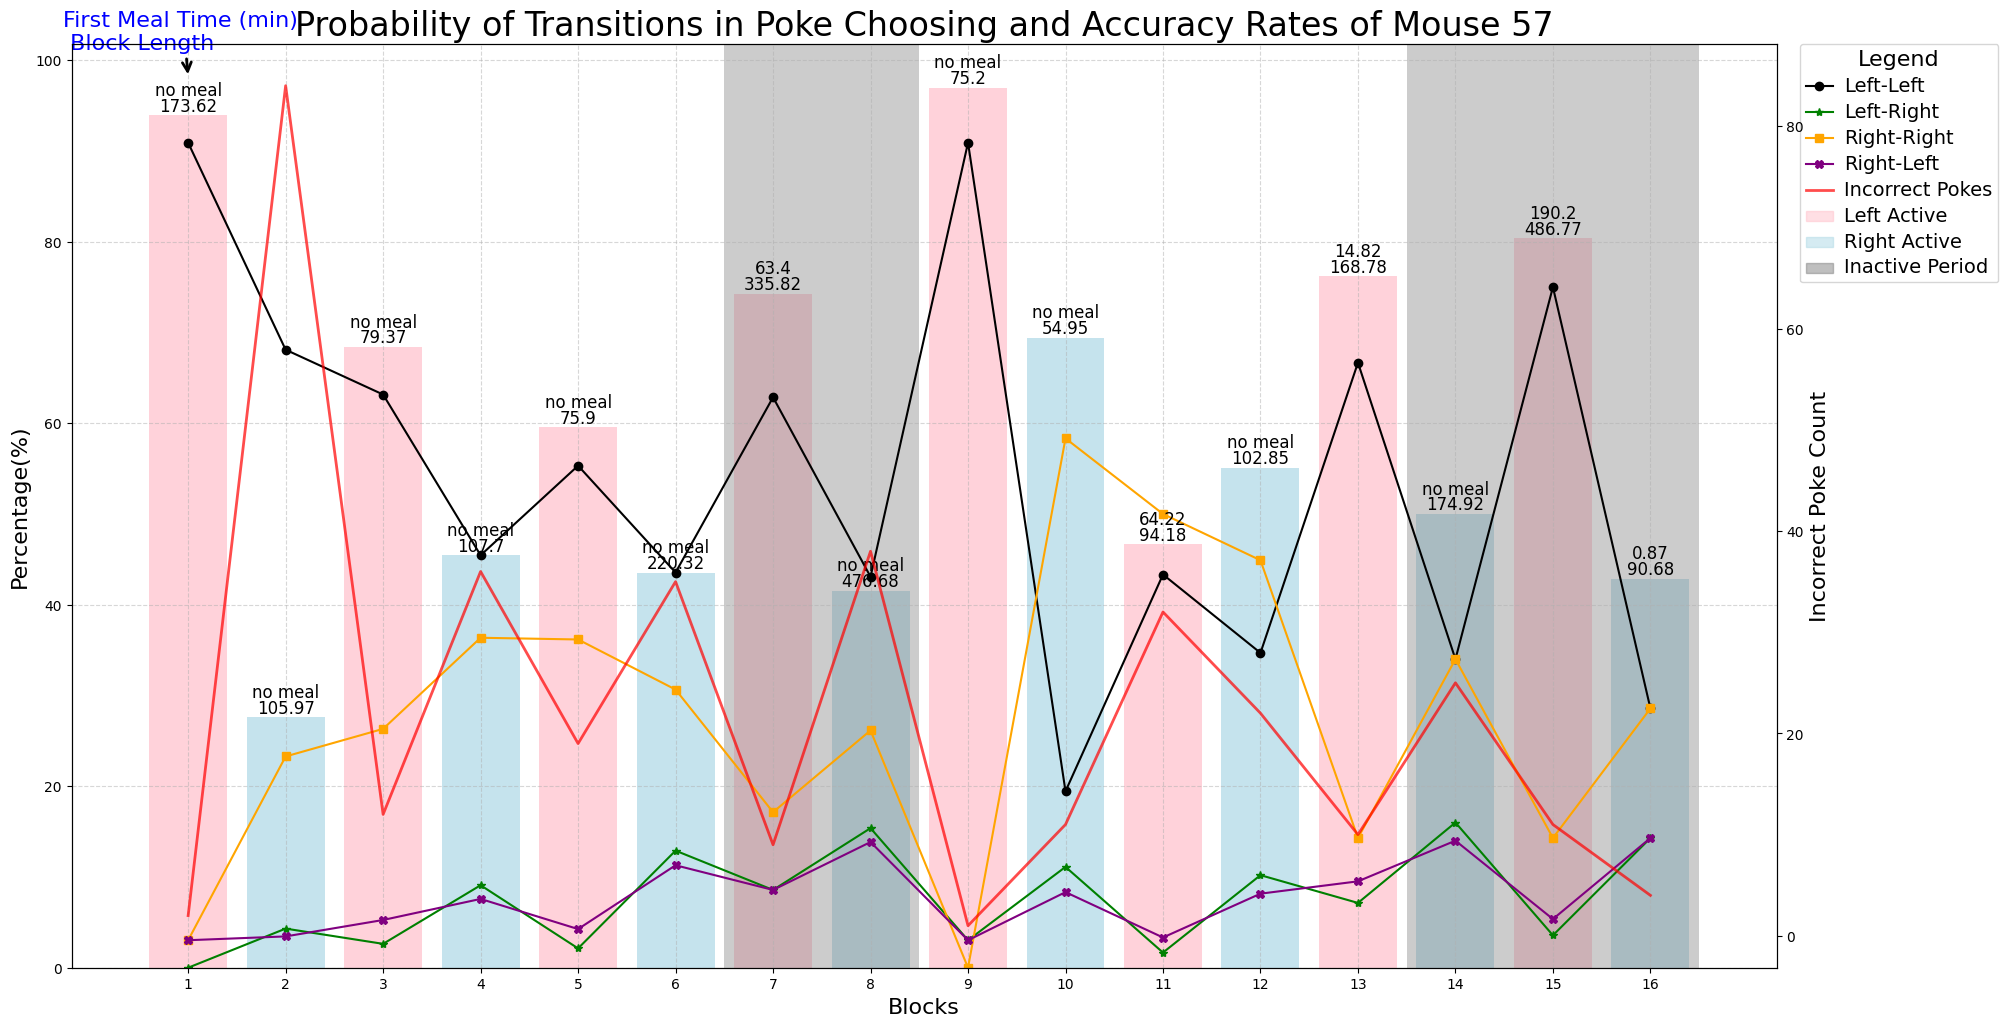

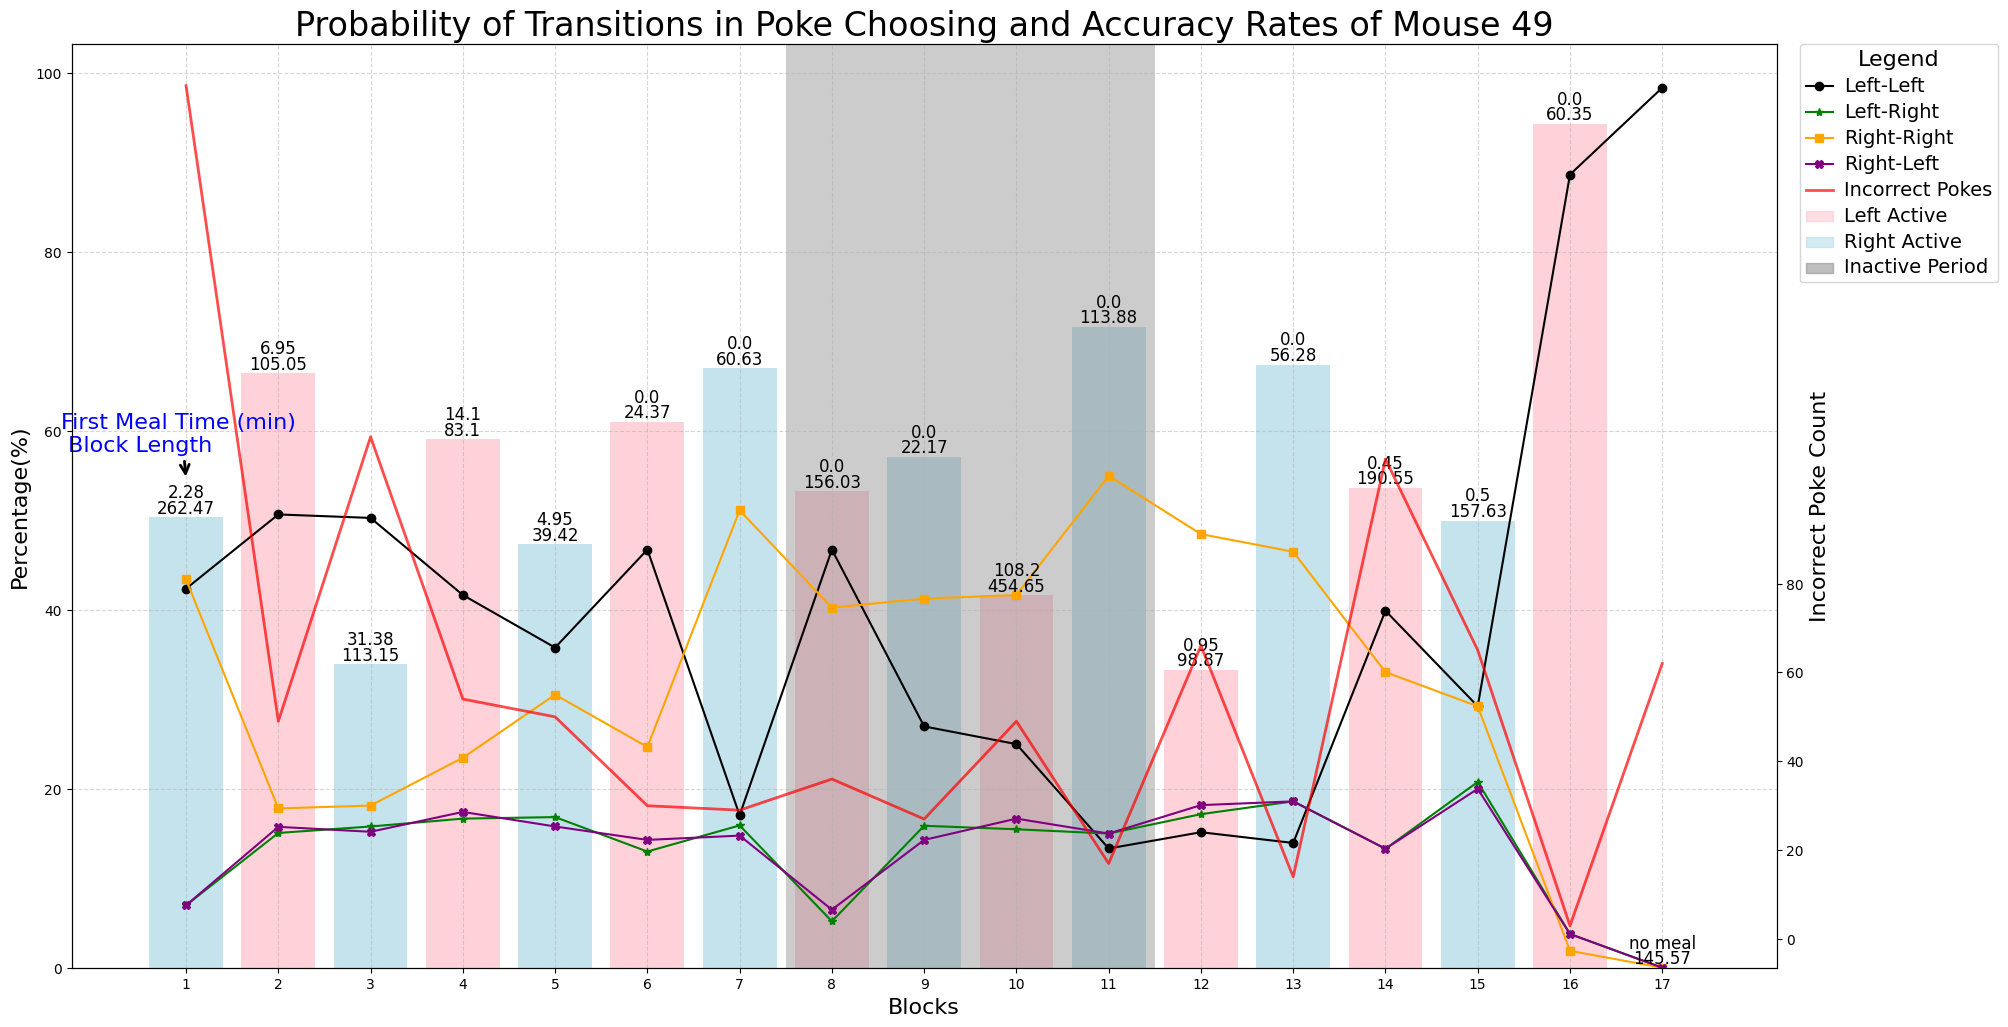

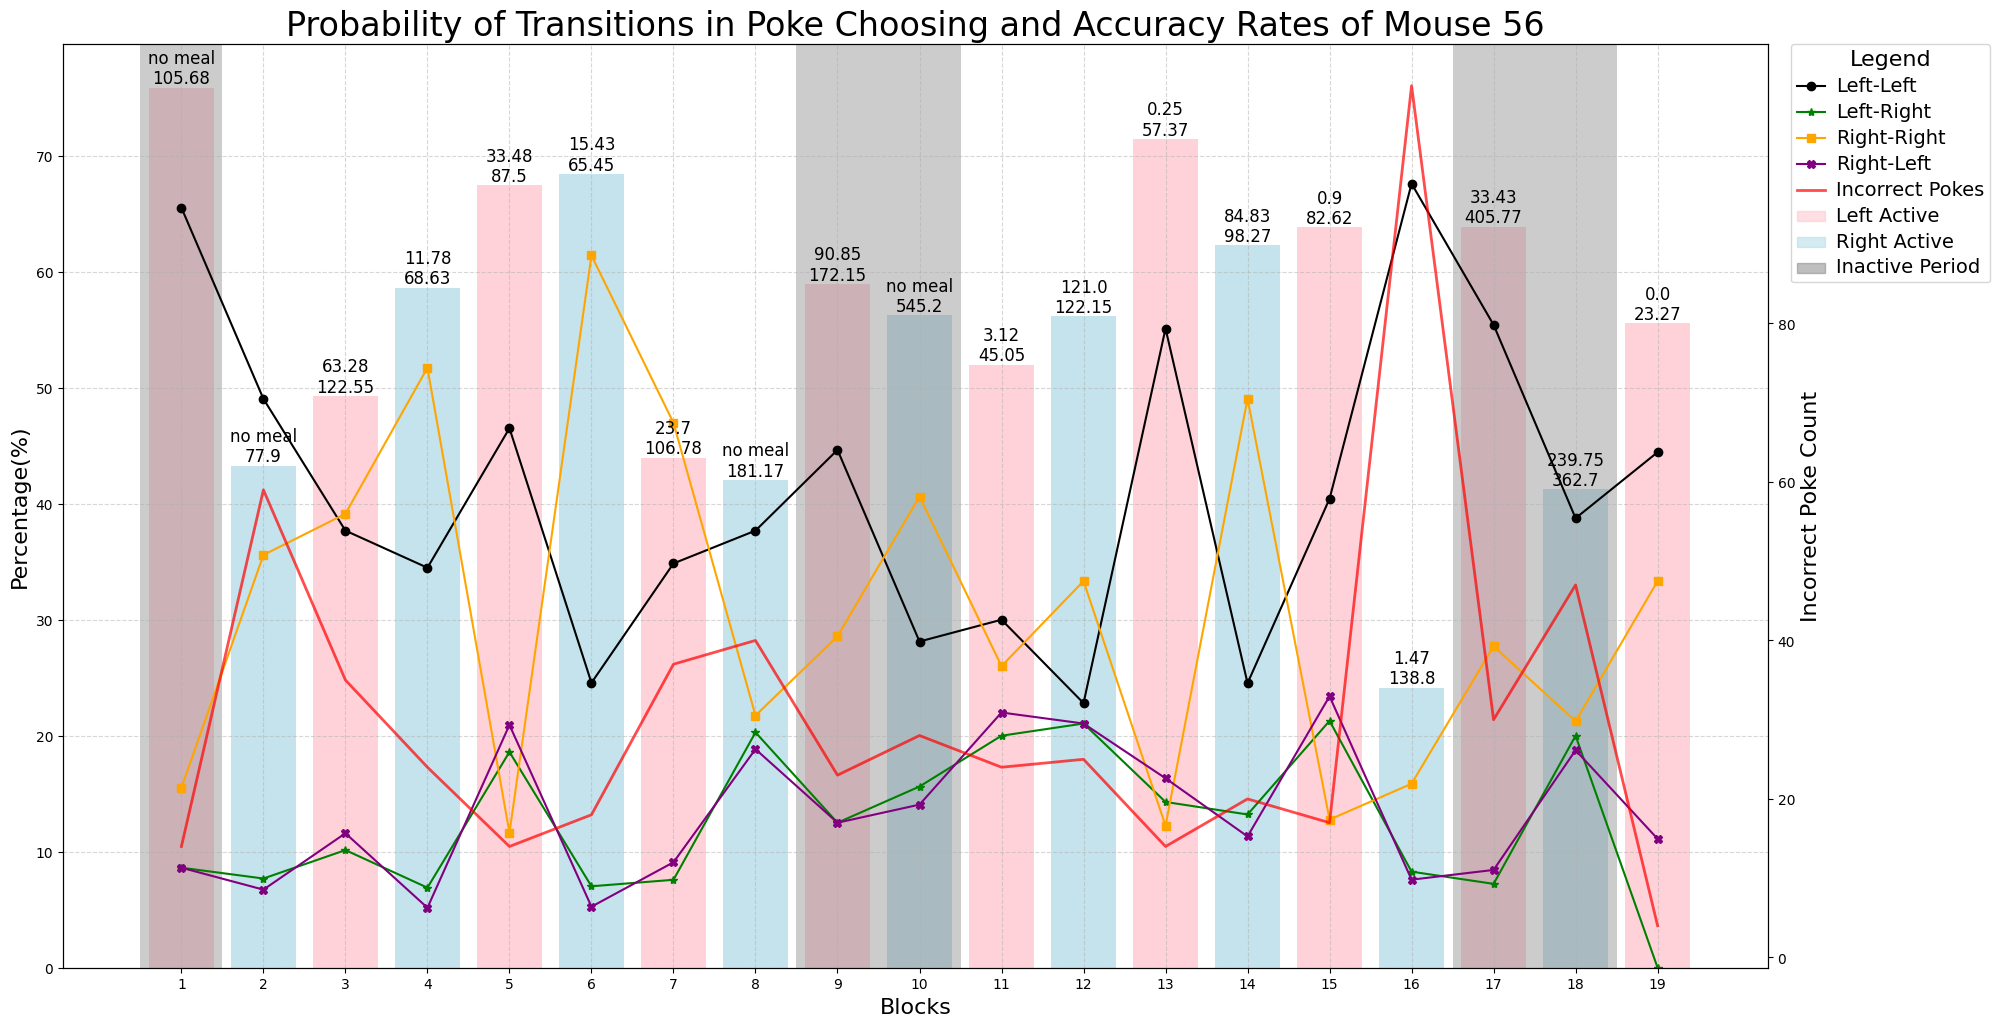

In [17]:
exp_block_fir_meal = []
exp_block_fir_meal_prop = []
for path in paths.reversal_ivsa_exp:
        data_dropped = read_csv_clean(path, remove_trivial=False, collect_time=True)
        blocks = dit.split_data_to_blocks(data_dropped)
        # meal = ml.find_meals(data, pellet_count_threshold=pellet_count_threshold, 
        #                      collect_quantile=collect_quantile, pellet_quantile=pellet_quantile)
        meal = find_meals_paper(data_dropped, time_threshold=12)
        data_stats = dit.get_transition_info(blocks, meal, reverse=True)
        
        avg_ratio, avg_time = dit.first_meal_stats(data_stats, ignore_inactive=True)
        exp_block_fir_meal.append(avg_time)
        exp_block_fir_meal_prop.append(avg_ratio)
        dit.graph_tranition_stats(data_stats, blocks, path)

Control Size: 6
PICA Size: 7
Control Average: 107.17333333333333
PICA Average: 46.760714285714286
Control Standard Deviation: 59.43096546975042
PICA Standard Deviation: 34.23894948599857


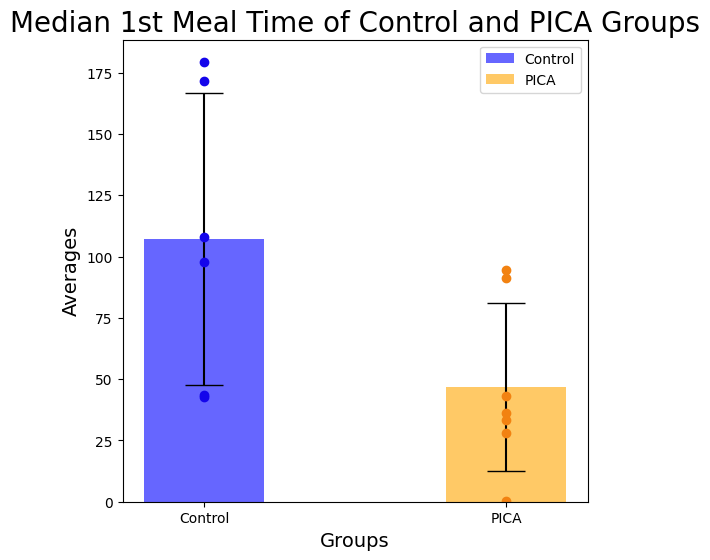

In [18]:
graph_group_stats(ctrl_block_fir_meal, exp_block_fir_meal, stats_name='Median 1st Meal Time', exp_name='PICA')

In [19]:
invs.perform_T_test(ctrl_block_fir_meal, exp_block_fir_meal, test_side='less')

P Value is  0.02132041379471469
Experiment group is significantly less than control group


Control Size: 6
PICA Size: 7
Control Average: 0.7851592138296927
PICA Average: 0.49942447522112504
Control Standard Deviation: 0.3329276283237436
PICA Standard Deviation: 0.3721984177194876


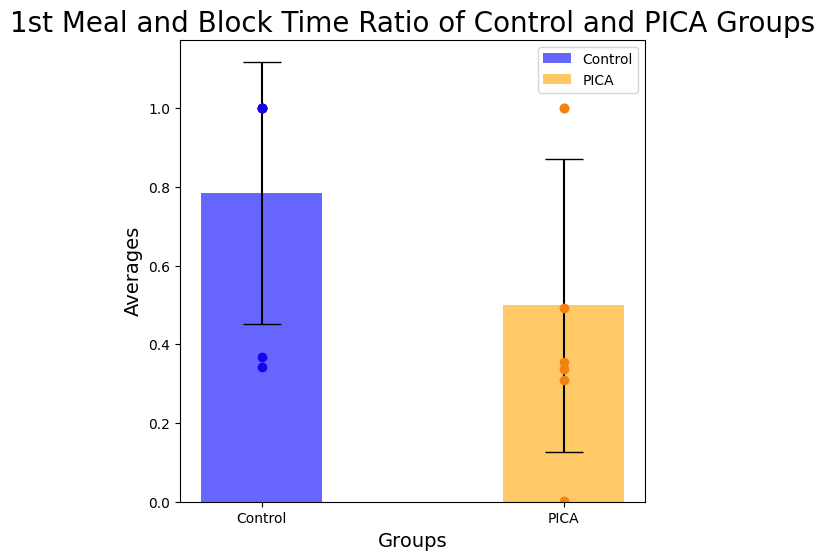

In [20]:
graph_group_stats(ctrl_block_fir_meal_prop, exp_block_fir_meal_prop, stats_name='1st Meal and Block Time Ratio', exp_name='PICA')

In [22]:
invs.perform_T_test(ctrl_block_fir_meal_prop, exp_block_fir_meal_prop, test_side='less')

P Value is  0.08786733888887392
There is no significant difference between the two groups.
